In [1]:
from ExcitonBSEKeldysh import ExcitonMoS2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
Exciton=ExcitonMoS2(epsilon=2.5,N=30,vb=[6],cb=[7],spin_orbit=False,cutoff=0.6,shift=0.7)
Exciton.constructTrionBasis()

In [131]:
Exciton.HT.nbytes/(24061**2)*(115303**2)/1024/1024/1024

0.6668755842903602

In [127]:
Exciton.NT

24061

In [111]:
Exciton.NT

376807

In [130]:
Exciton.constructTrionHamiltonian()
Exciton.constuctExcitonHamiltonian()

In [115]:
Exciton.calculateAbsobtionSpectrumTrion(eta=0.0001,omega_min=2.0,omega_max=2.4)
Exciton.calculateAbsobtionSpectrum(eta=0.0001,omega_min=2.0,omega_max=2.4)

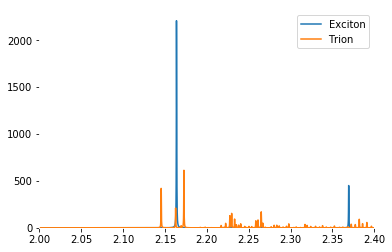

In [92]:
Exciton.plotAbsobtionSpectrum()
plt.xlim([2.0,2.4])
plt.ylim([0,None])
plt.grid()
# # plt.yticks([])
# plt.xlabel('Energy [eV]')
# plt.ylabel('Absorption')
# plt.title('Full:{0}x{0} Cutoff:0.6 With SOC'.format(24))
# # plt.grid()
# plt.savefig('With_SOC/Trion_vs_Exciton_{0}.png'.format(24),dpi=600)


In [93]:
from scipy.sparse.linalg import eigsh

In [94]:
ET,DT=eigsh(Exciton.HT,which='SA',k=12)

In [95]:
ET-=Exciton.trion_spectrum_shift

In [96]:
ET

array([2.14544915, 2.15672865, 2.16269352, 2.16926078, 2.17009782,
       2.17258342, 2.17345165, 2.17485777, 2.17630304, 2.19130901,
       2.1924205 , 2.19673357])

In [97]:
indexes=[];
KX=[];KY=[]
for i,indx in enumerate(Exciton.trion_indexes):
    i1,i2,j=indx
    x1,y1,c1=Exciton.conduction_states[i1]
    x2,y2,c2=Exciton.conduction_states[i2]
    x,y,v=Exciton.conduction_states[j]
    if x2==Exciton.trion_q[0] and y2==Exciton.trion_q[1]:
        KX.append(x1);
        KY.append(y1)
        indexes.append(i)
    if x1==Exciton.trion_q[0] and y1==Exciton.trion_q[1]:
        KX.append(x2);
        KY.append(y2)
        indexes.append(i)

In [106]:
c/=np.sum(c)
K=Exciton.K[KX,KY]


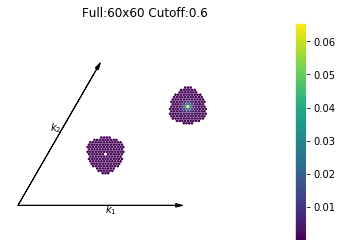

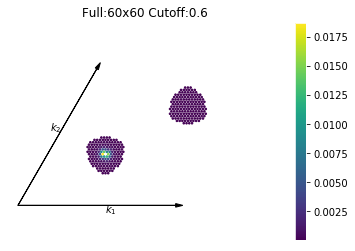

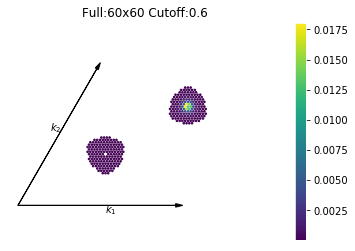

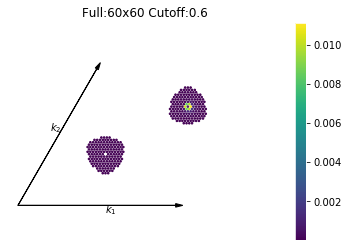

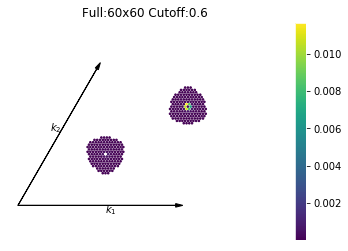

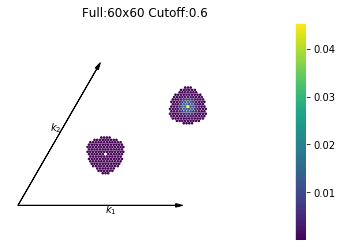

In [109]:
import matplotlib
matplotlib.rc('axes',edgecolor='white')

for i in range(6):
    plt.figure()
    c=np.abs(DT[indexes,i])**2
    plt.title('Full:{0}x{0} Cutoff:{1}'.format(Exciton.N,Exciton.cutoff))
    plt.scatter(Exciton.K[:,:,0],Exciton.K[:,:,1],c='white',marker='.',s=10,label='Full')
    plt.scatter(K[:,0],K[:,1],c=c,marker='.',s=10,label='Reduced')
    plt.colorbar()
    plt.axis('equal')
    # plt.legend()
    plt.xticks([]);plt.yticks([])
    delta=0.05
    plt.arrow(0-np.sqrt(2)*delta, 0-delta, Exciton.k1[0], Exciton.k1[1], head_width=0.05, head_length=0.1, fc='k', ec='k',length_includes_head=True)
    plt.arrow(0-np.sqrt(2)*delta, 0-delta, Exciton.k2[0], Exciton.k2[1], head_width=0.05, head_length=0.1, fc='k', ec='k',length_includes_head=True)
    plt.text(Exciton.k1[0]/2,-0.15, s='$k_1$')
    plt.text(Exciton.k2[0]/2-0.2,Exciton.k2[1]/2, s='$k_2$')
    plt.savefig('Trion_wave_function_{0}.png'.format(i),dpi=600)
